# Heart Disease Prediction Using Logistic Regression

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Data Collection or Loading the Dataset

In [2]:
# dataset
disease_df = pd.read_csv(r"C:\Users\Hasnain\Desktop\APPTECH\framingham.csv")
disease_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
#Remove education coluomn because it is not need in my project working
disease_df.drop(['education'], inplace = True, axis = 1)

In [5]:
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [6]:
disease_df.head(10)

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [7]:
print(disease_df.head())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [8]:
disease_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex_male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0
sysBP,4240.0,132.354599,22.033300,83.50,117.00,128.0,144.00,295.0


# Missing Values

we can see just missing values

In [9]:
missing_values_count = disease_df.isnull().sum()

In [10]:
missing_values_count

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Handling Missing Values

In [11]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print( disease_df.shape)

(3751, 15)


In [12]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


# Creating the targets

In [13]:
X = disease_df.drop(['TenYearCHD','BMI', 'heartRate','currentSmoker','diaBP'],axis=1)
y = disease_df['TenYearCHD']

In [14]:
## Checking the percentage of 1's and 0's
y.sum() / y.shape[0]

0.15249266862170088

In [15]:
X

,Sex_male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose
0,1,39,0.0,0.0,0,0,0,195.0,106.0,77.0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,76.0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,70.0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,103.0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,86.0
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,68.0
4237,0,52,0.0,0.0,0,0,0,269.0,133.5,107.0
4238,1,40,0.0,0.0,0,1,0,185.0,141.0,72.0


In [16]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64

# Standardizing the dataset

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [19]:
scaler = MinMaxScaler()

In [20]:
svm = SVC(kernel = "linear")

In [21]:
svm

SVC(kernel='linear')

In [22]:
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [23]:
scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train_scaled = scaler.transform(X_train)

In [25]:
X_test_scaled = scaler.transform(X_test)

In [26]:
svm.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [27]:
scaled_acc = svm.score(X_test_scaled,y_test)

In [28]:
print("The scaled accuracy is:",{scaled_acc})

The scaled accuracy is: {0.8588548601864181}


# Using Standard Scaler

In [29]:
s_scaler = StandardScaler()

In [30]:
s_scaler.fit(X_train)

StandardScaler()

In [31]:
X_train_Sscaled = s_scaler.transform(X_train)

In [32]:
X_test_Sscaled = s_scaler.transform(X_test)

In [33]:
svm.fit(X_train_Sscaled,y_train)

SVC(kernel='linear')

In [34]:
s_scaled_acc = svm.score(X_test_Sscaled,y_test)


In [35]:
print("The Standard scaled accuracy is:",{s_scaled_acc})

The Standard scaled accuracy is: {0.8588548601864181}


# Preprocessing 

Split dataset in training and testing

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
print( X_train.shape, y_train.shape)

(3000, 10) (3000,)


In [38]:
print( X_test.shape, y_test.shape)

(751, 10) (751,)


In [39]:
print ('Train set:', X_train,  y_train)

Train set:       Sex_male  age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
2196         1   39         0.0     0.0                0             0   
450          0   55         0.0     0.0                0             0   
3462         1   57         0.0     0.0                0             0   
4067         1   42        30.0     0.0                0             0   
4013         1   39         9.0     0.0                0             0   
...        ...  ...         ...     ...              ...           ...   
669          0   49         0.0     0.0                0             1   
1797         0   40         3.0     0.0                0             0   
1522         1   51        10.0     0.0                0             1   
1737         0   38         0.0     0.0                0             0   
966          1   64         0.0     0.0                0             0   

      diabetes  totChol  sysBP  glucose  
2196         0    190.0  114.0     80.0  
450          0  

In [40]:
print ('Test set:', X_test,  y_test)

Test set:       Sex_male  age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
2958         1   54         0.0     0.0                0             1   
123          0   46         0.0     0.0                0             1   
3897         1   58         0.0     0.0                0             1   
716          1   49        20.0     0.0                0             1   
3702         1   40        20.0     0.0                0             0   
...        ...  ...         ...     ...              ...           ...   
2923         1   43        30.0     0.0                0             0   
486          0   39         0.0     0.0                0             0   
911          0   35         5.0     0.0                0             0   
1555         0   38        12.0     0.0                0             0   
2386         1   40        20.0     0.0                0             0   

      diabetes  totChol  sysBP  glucose  
2958         0    180.0  147.5     70.0  
123          0   

In [41]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

In [42]:
log_model = LogisticRegressionCV()

In [43]:
log_model.fit(X_train,y_train)

C:\Users\Hasnain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hasnain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

LogisticRegressionCV()

In [44]:
log_model.score(X_train, y_train)

0.8516666666666667

# Optimal parameters, specifically the C value

In [45]:
log_model.C_

array([0.04641589])

In [46]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

# Calculating intercept and coefficient

In [47]:
log_model.intercept_

array([-8.61862038])

In [48]:
log_model.coef_

array([[ 0.49824084,  0.06630013,  0.02241675,  0.03455064,  0.15662388,
         0.145393  , -0.07318402,  0.00111569,  0.01369624,  0.01009193]])

In [49]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [50]:
coefs = coefs.sort_values()

<Axes: >

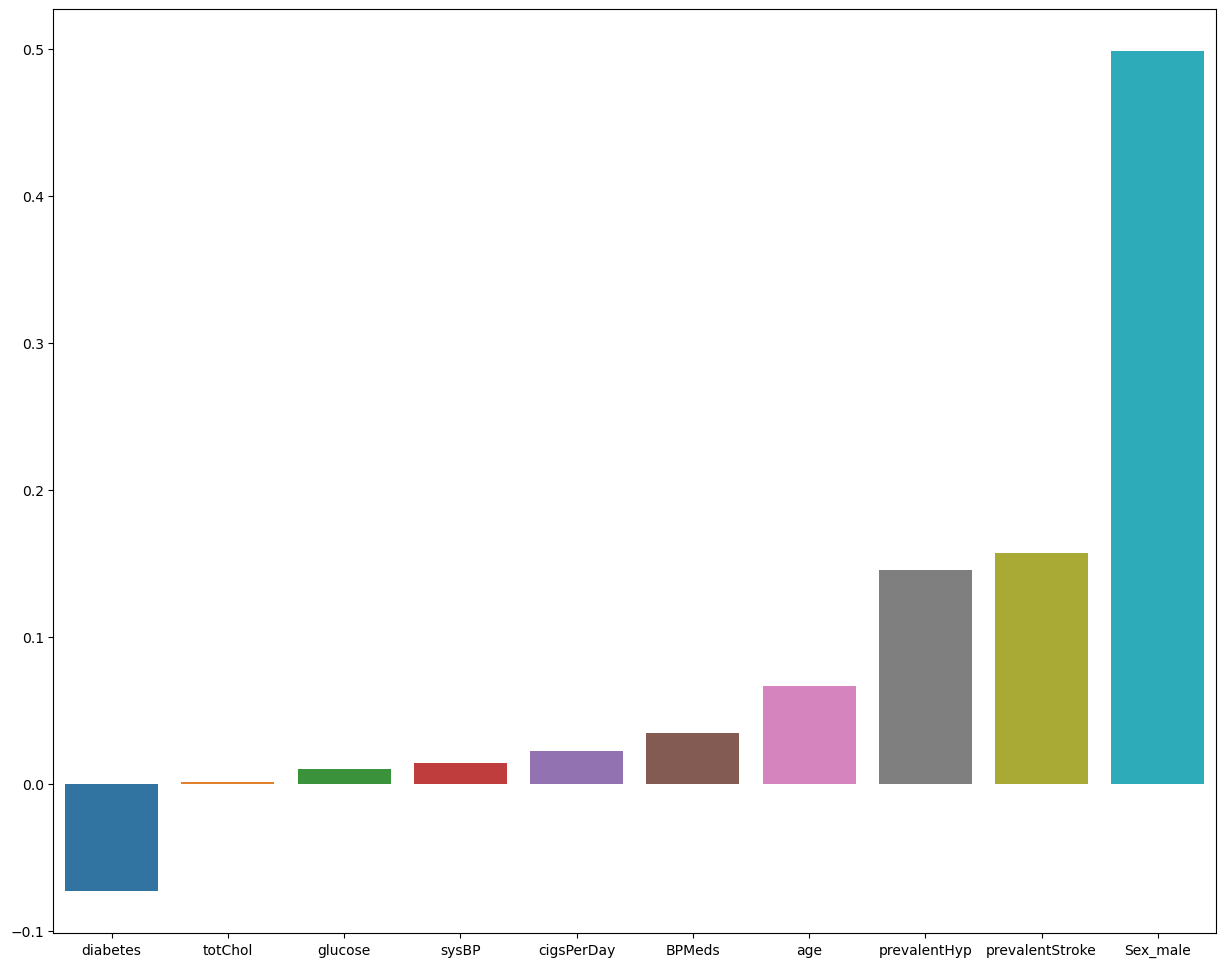

In [95]:
plt.figure(figsize=(15,12))
sns.barplot(x=coefs.index,y=coefs.values)
#plt.savefig('chd_coef_table.png');

# Exploratory Data Analysis of Heart Disease Dataset

counting no. of patients affected with coronary heart disease CHD 


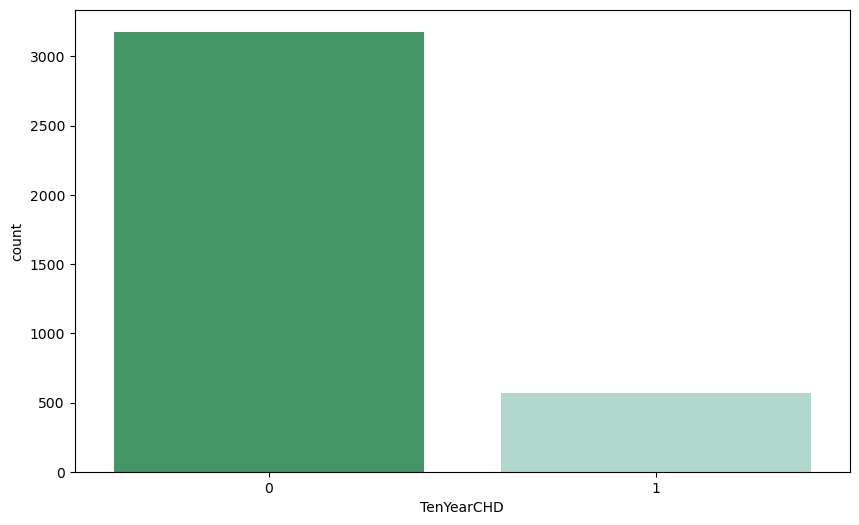

In [52]:
# counting no. of patients affected with CHD
plt.figure(figsize=(10, 6))
sns.countplot(x='TenYearCHD', data=disease_df,palette="BuGn_r")
title ="counting no. of patients affected with coronary heart disease CHD "
print(title)
plt.show()


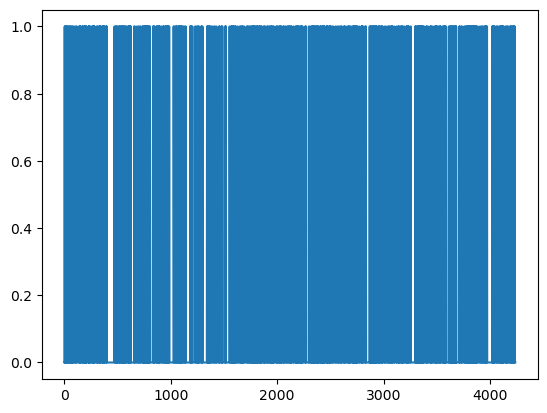

In [53]:
z = disease_df['TenYearCHD'].plot()
plt.show(z)


# Fitting Logistic Regression Model for Heart Disease Prediction

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


C:\Users\Hasnain\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
logreg.score(X_train, y_train)

0.8453333333333334

# Evaluating Logistic Regression Model

In [56]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.8455392809587217


# Confusion Matrix

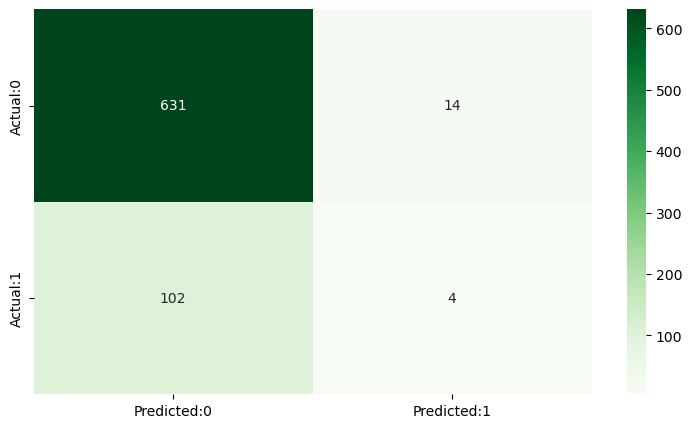

The details for confusion matrix is =


In [57]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (9, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')



In [58]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       645
           1       0.22      0.04      0.06       106

    accuracy                           0.85       751
   macro avg       0.54      0.51      0.49       751
weighted avg       0.77      0.85      0.80       751



# Heat Map For Correlation Visualization

<Axes: >

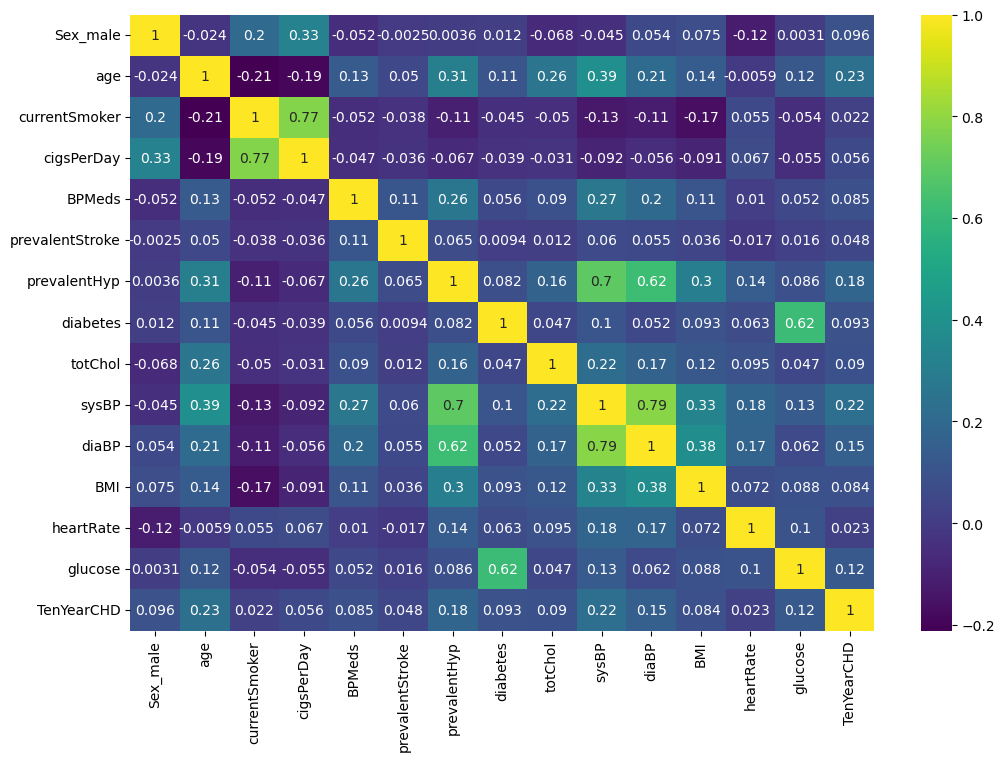

In [93]:
plt.figure(figsize=(12,8))
sns.heatmap(disease_df.corr(),annot=True,cmap='viridis')

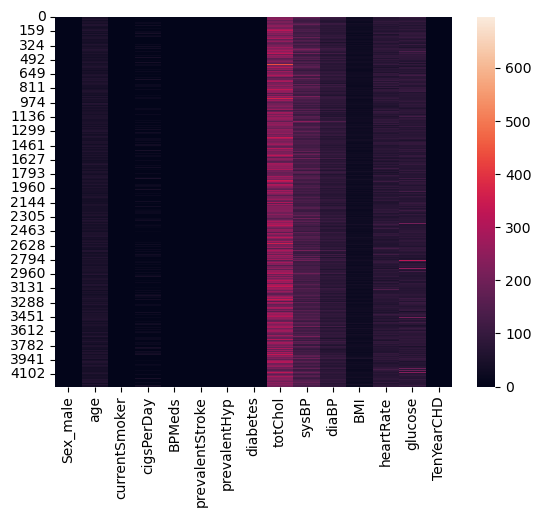

In [60]:
h_m = sns.heatmap(data=disease_df)

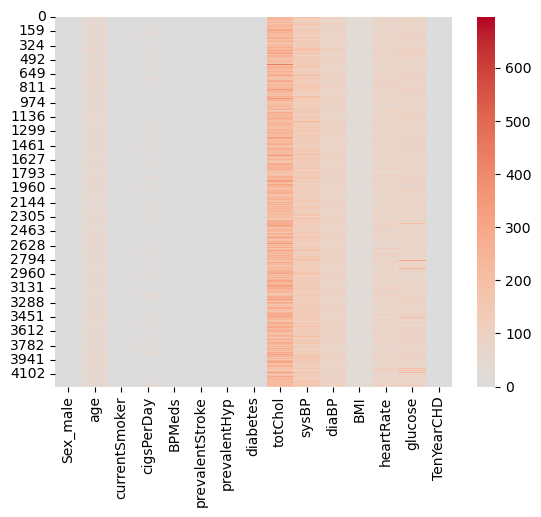

In [61]:
hm = sns.heatmap(data =disease_df,cmap = "coolwarm",center = 0)

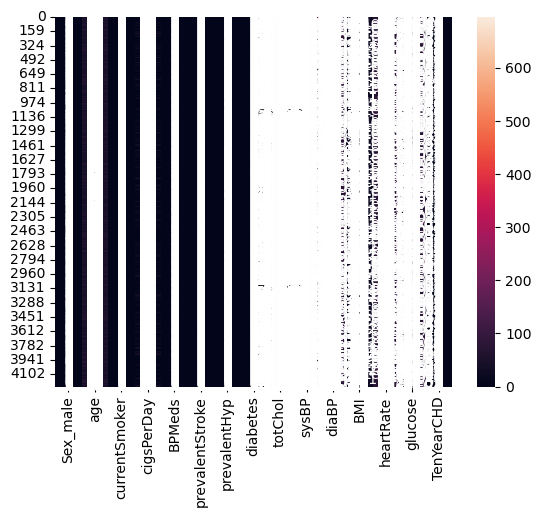

In [62]:
annot = True
hm = sns.heatmap(data = disease_df,annot = annot)

<Axes: >

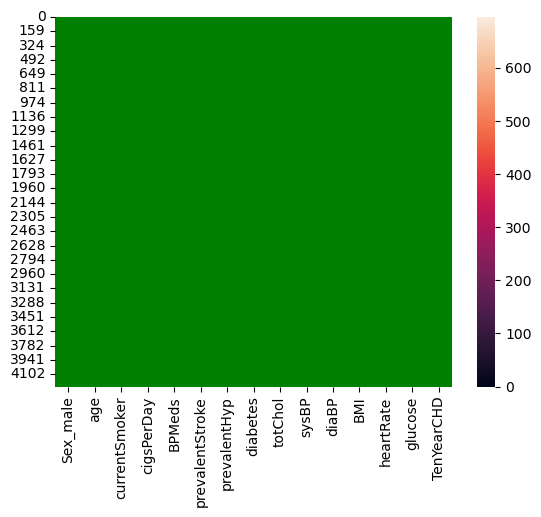

In [63]:
linewidths = 2
linecolor = "green"
sns.heatmap(data = disease_df, linewidths = linewidths, linecolor = linecolor)

<Axes: >

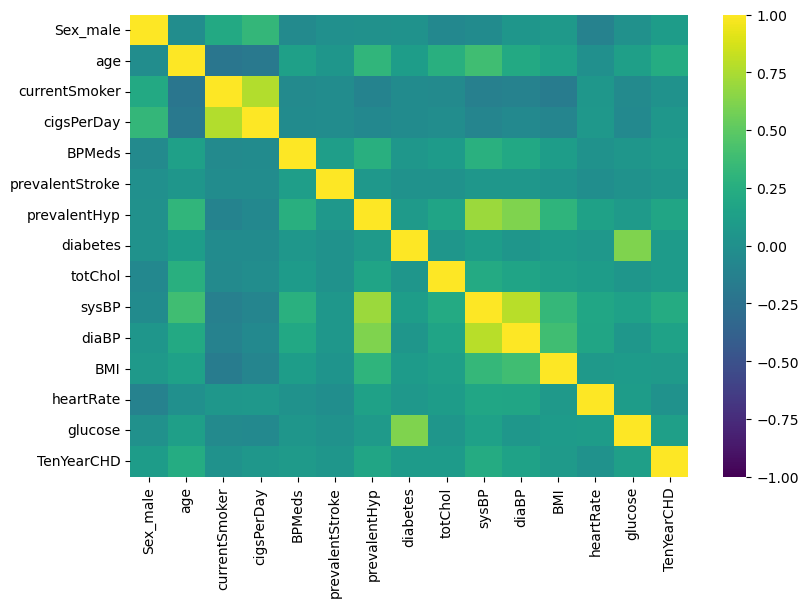

In [64]:
my_corr = disease_df.corr()
plt.figure(figsize = (9,6))      #here in figsize: 10 is width and 8 is height
sns.heatmap(my_corr,cmap = "viridis", vmin = -1, vmax = 1,center = 0)

<Axes: >

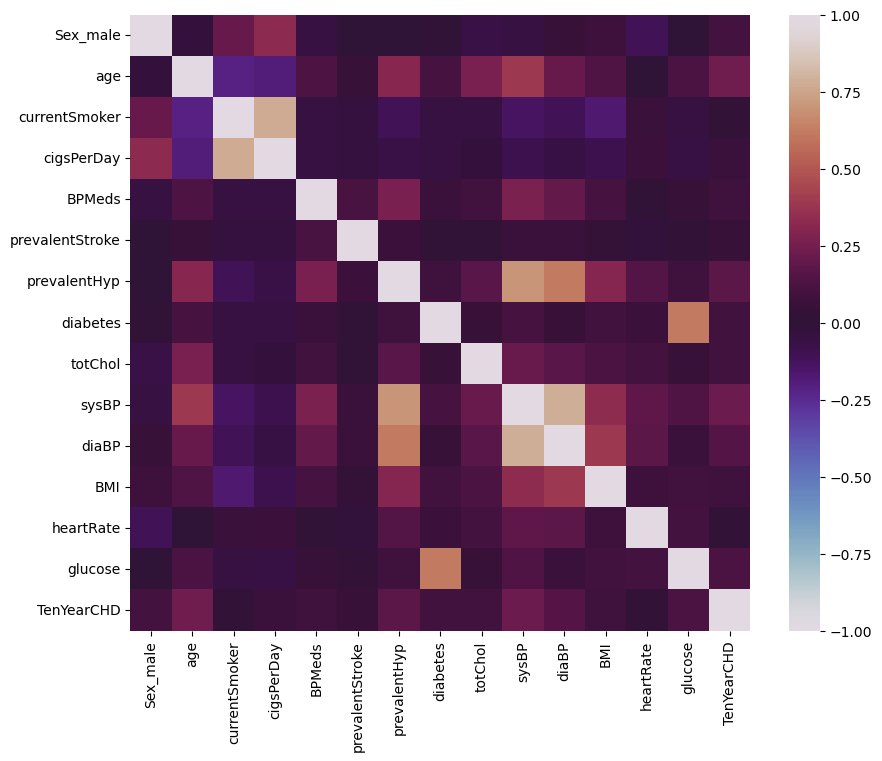

In [65]:
my_corr = disease_df.corr()
plt.figure(figsize = (10,8))      #here in figsize: 10 is width and 8 is height
sns.heatmap(my_corr,cmap = "twilight", vmin = -1, vmax = 1,center = 0)

<Axes: >

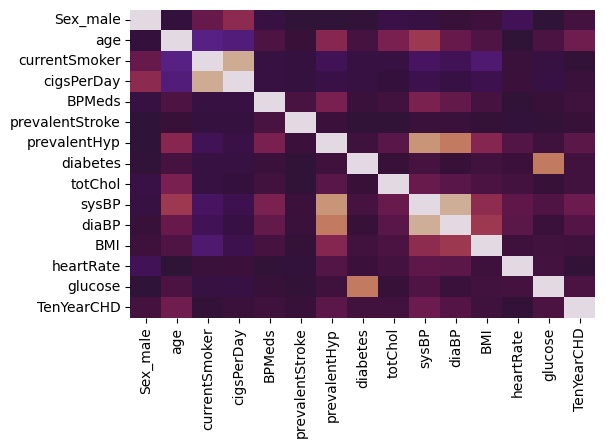

In [66]:
my_corr = disease_df.corr()
plt.figure(figsize = (6,4))      #here in figsize: 10 is width and 8 is height
sns.heatmap(my_corr, cbar = False,cmap = "twilight", vmin = -1, vmax = 1,center = 0)

# HistoPlot

<Axes: xlabel='age', ylabel='Count'>

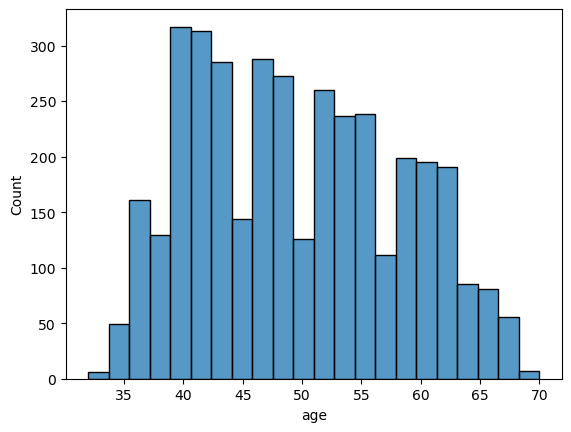

In [67]:
sns.histplot(data=disease_df, x = "age")

<Axes: xlabel='currentSmoker', ylabel='Count'>

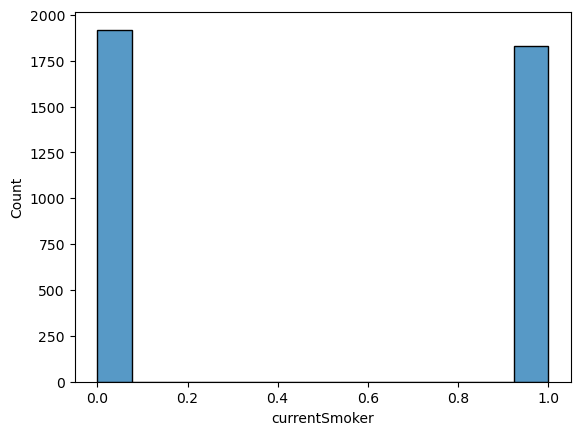

In [68]:
sns.histplot(data=disease_df, x="currentSmoker")

<Axes: xlabel='cigsPerDay', ylabel='Count'>

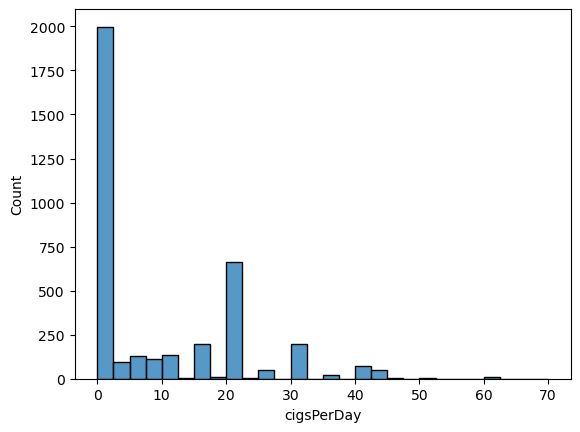

In [69]:
sns.histplot(data=disease_df, x="cigsPerDay")

<Axes: xlabel='BPMeds', ylabel='Count'>

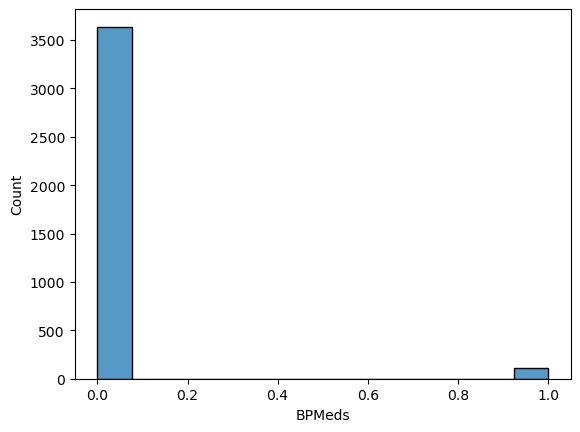

In [70]:
sns.histplot(data=disease_df, x="BPMeds")

<Axes: xlabel='prevalentStroke', ylabel='Count'>

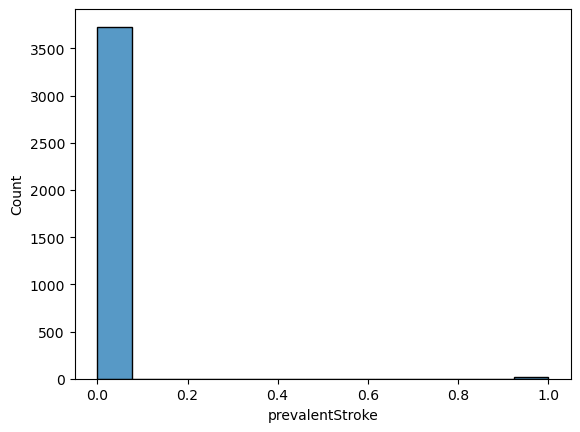

In [71]:
sns.histplot(data=disease_df, x="prevalentStroke")

<Axes: xlabel='diabetes', ylabel='Count'>

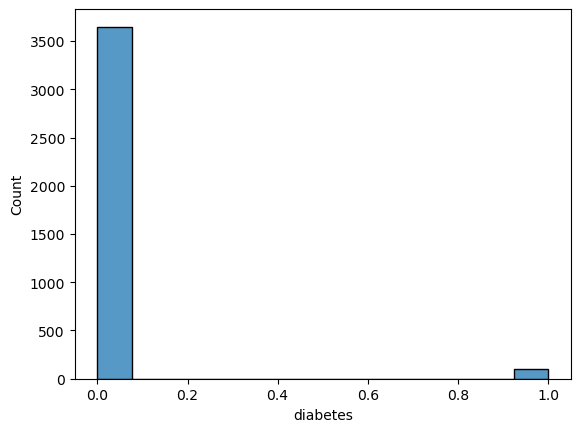

In [72]:
sns.histplot(data=disease_df, x="diabetes")

<Axes: xlabel='totChol', ylabel='Count'>

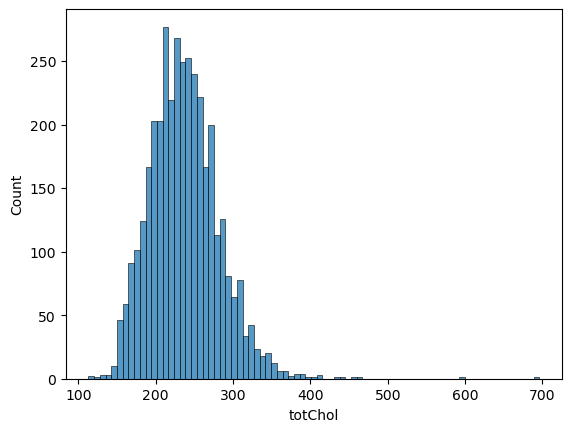

In [73]:
sns.histplot(data=disease_df, x="totChol")

<Axes: xlabel='sysBP', ylabel='Count'>

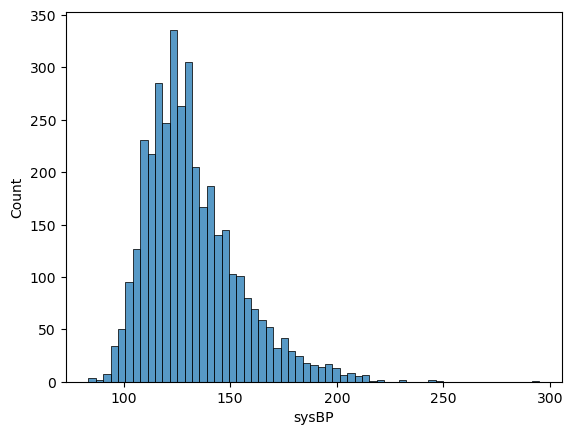

In [74]:
sns.histplot(data=disease_df, x="sysBP")

<Axes: xlabel='diaBP', ylabel='Count'>

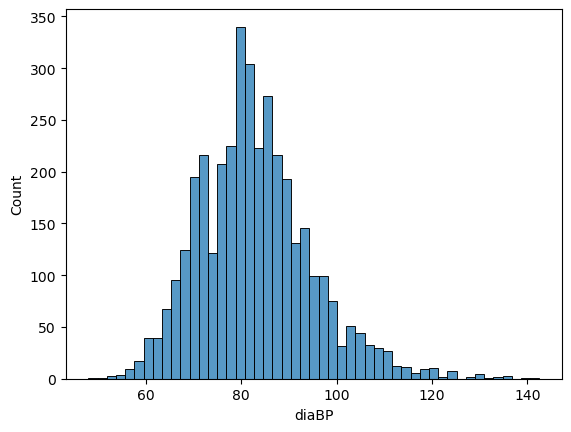

In [75]:
sns.histplot(data=disease_df, x="diaBP")

<Axes: xlabel='BMI', ylabel='Count'>

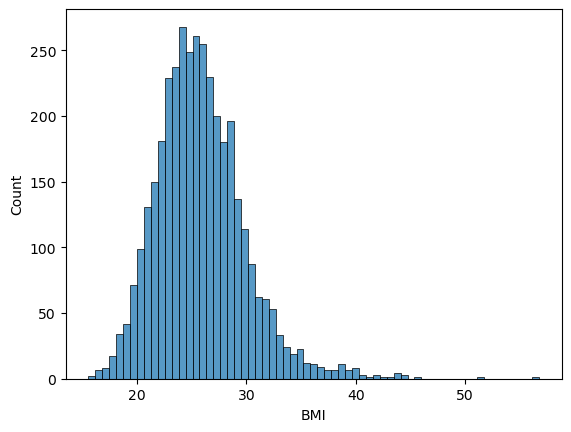

In [76]:
sns.histplot(data=disease_df, x = "BMI")

<Axes: xlabel='heartRate', ylabel='Count'>

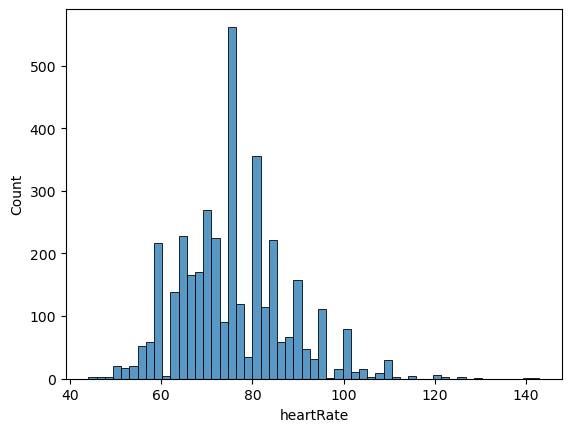

In [77]:
sns.histplot(data=disease_df, x="heartRate")

<Axes: xlabel='glucose', ylabel='Count'>

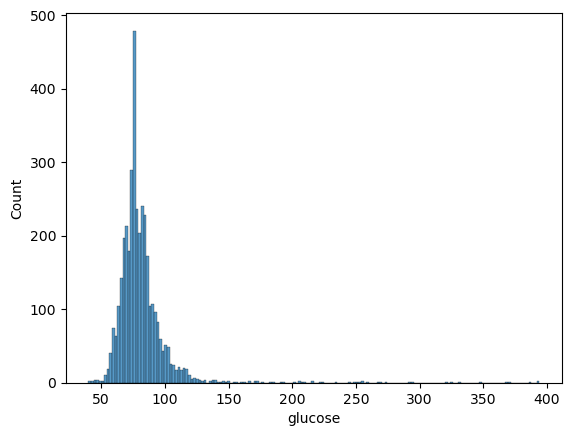

In [78]:
sns.histplot(data=disease_df, x="glucose")

<Axes: xlabel='TenYearCHD', ylabel='Sex_male'>

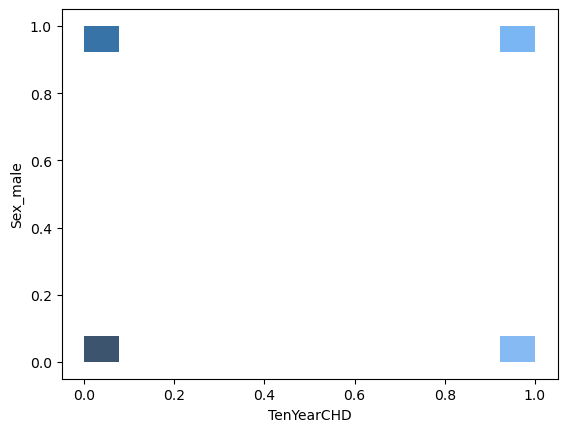

In [79]:
sns.histplot(data=disease_df, x="TenYearCHD",y="Sex_male")

# Scatter plot

<Axes: xlabel='age', ylabel='BMI'>

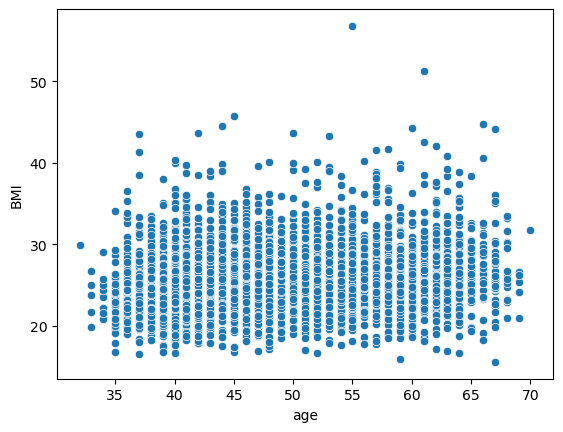

In [80]:
sns.scatterplot(x = "age",y ="BMI",data=disease_df)

<Axes: xlabel='age', ylabel='BMI'>

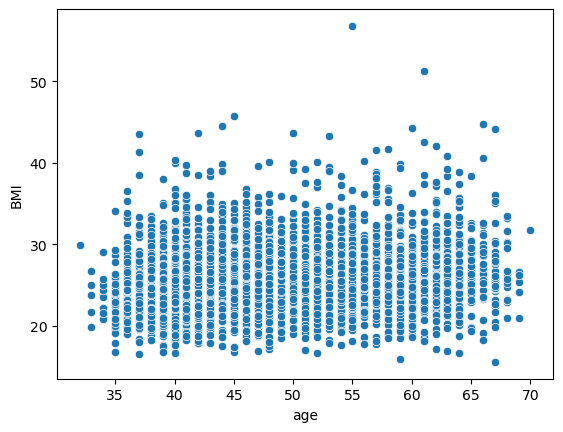

In [81]:
sns.scatterplot(x = "age",y="BMI",data=disease_df)

Text(0.5, 1.0, 'Relationship  between age  and glucose')

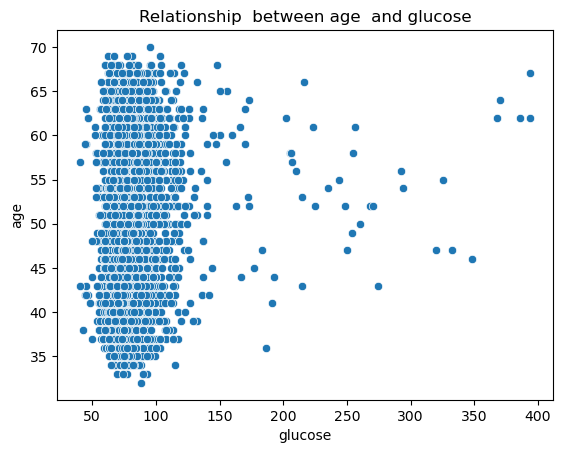

In [82]:
sns.scatterplot(x = "glucose",y ="age",data=disease_df)
plt.xlabel("glucose")
plt.ylabel("age")
plt.title("Relationship  between age  and glucose")

<Axes: xlabel='glucose', ylabel='age'>

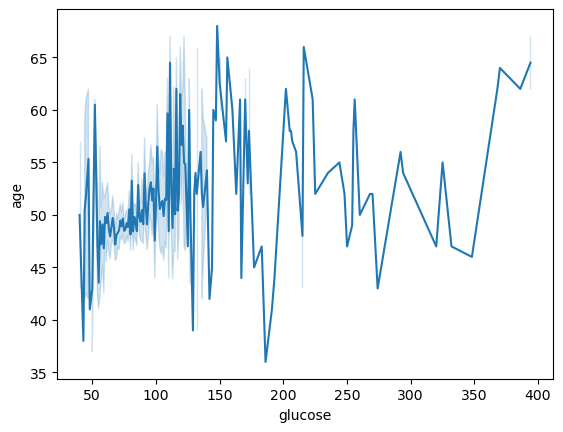

In [83]:
sns.lineplot( x = "glucose",y ="age",data =disease_df)

<Axes: xlabel='glucose', ylabel='age'>

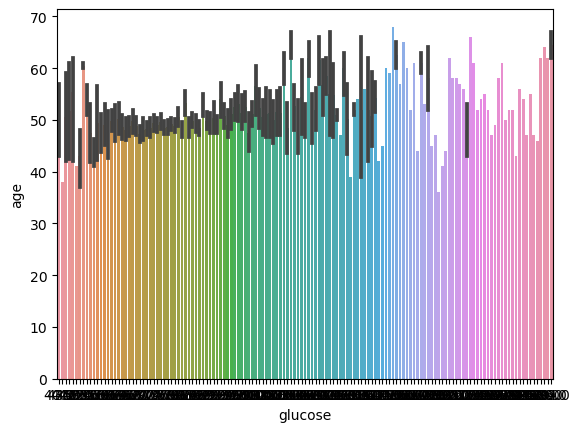

In [84]:
sns.barplot( x = "glucose",y ="age",data =disease_df)

<Axes: xlabel='age', ylabel='TenYearCHD'>

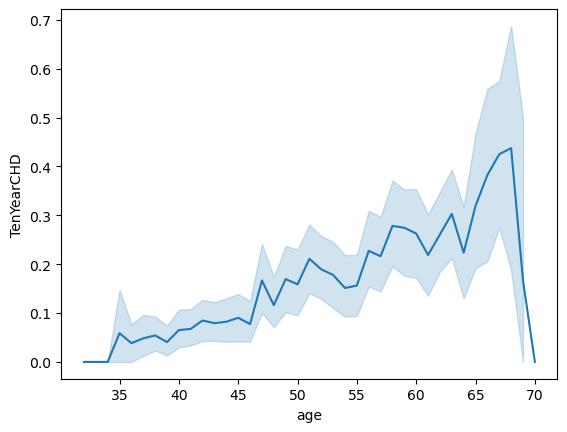

In [85]:
sns.lineplot( x = "age",y="TenYearCHD",data =disease_df)

<Axes: xlabel='glucose', ylabel='TenYearCHD'>

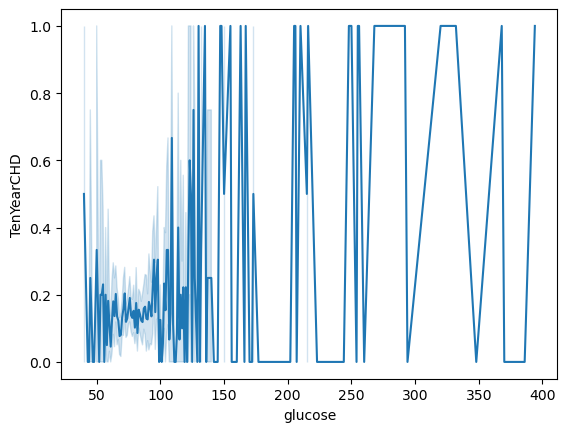

In [86]:
sns.lineplot( x = "glucose",y="TenYearCHD",data =disease_df)

# Testing the model

In [87]:
log_model.score(X_test,y_test)

0.8628495339547271